# **Transact-SQL**

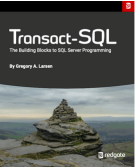

### [The Building Blocks to SQL Server Programming](https://drive.google.com/file/d/1UTuTraPWyKHiMxRy84eSM1UsUR8CfT-7/view?usp=sharing)

**By Gregory A. Larsen**

## **Chapter 1 - The Basic SELECT Statement**

### **The Three Parts in a SELECT Statement**

A basic **SELECT** statement that returns data from a single table consists of three different parts: The Column list, the **FROM** clause, and the **WHERE** Clause. The syntax for constructing a basic SELECT statement using these different components looks like:

In [ ]:
SELECT <Column List>
FROM <table name>
WHERE <where criteria>

The _**\<Column List\>**_ will contain a list of columns that you want to returned from the query, _**\<table\_name\>**_ will contain the table from which the data is selected, and the **_\<where criteria\>_** will identify the search criteria that will be used to constrain the rows that will be returned from the SELECT statement. Note that the WHERE clause is optional.

In [3]:
SELECT  ProductCategoryID,
        NAME
FROM    AdventureWorks2017.Production.ProductCategory
WHERE   ProductCategoryID < 2 ;

(1 row affected)

Total execution time: 00:00:00.094

ProductCategoryID,NAME
1,Bikes


Here I selected two different collumns, _**ProductCategoryID**_ and Name, from the **_Production.ProductCategory_** table. Since this **SELECT** statement has a WHERE clause, it limits the rows returned from the table to only those rows that have a _ProductCategoryID_ value less tha 2.

### **The Column List**

The colummn list follows the SELECT keyword and is where you specify the columns you want to return from your table. The columns are identified by specifying the column name. If multiple columns are listed, they are separeted by commas. In later chapters, we'll look at the possibilities for returning values other than columns from the specified table. In this chapter, we're sticking to the basics. Building on the example above, let's explore what a column list might look like if it only selects a single column or all of the columns of a table.

If I only wanted to return the **_Name_** column of the **_Production.ProductCategory_** table my query would look like with this:

In [4]:
SELECT  Name
FROM    AdventureWorks2017.Production.ProductCategory
WHERE   ProductCategoryID < 2;

(1 row affected)

Total execution time: 00:00:00.006

Name
Bikes


Here you can see I only specified only the Name column between the SELECT and FROM keywords in the above query. But if I wanted to specify all of the columns in the Production.ProductCategory table, I would run the following query:

In [5]:
SELECT  ProductCategoryID ,
        Name ,
        rowguid ,
        ModifiedDate
FROM    AdventureWorks2017.Production.ProductCategory
WHERE   ProductCategoryID < 2 ;

(1 row affected)

Total execution time: 00:00:00.008

ProductCategoryID,Name,rowguid,ModifiedDate
1,Bikes,cfbda25c-df71-47a7-b81b-64ee161aa37c,2008-04-30 00:00:00.000


Another way to **_include all the columns_** is to specify an asterisk instead of the individual column names:

In [6]:
SELECT  *
FROM    AdventureWorks2017.Production.ProductCategory
WHERE   ProductCategoryID < 2 ;

(1 row affected)

Total execution time: 00:00:00.005

ProductCategoryID,Name,rowguid,ModifiedDate
1,Bikes,cfbda25c-df71-47a7-b81b-64ee161aa37c,2008-04-30 00:00:00.000


Care needs to be taken when using the asterisk (usually referred to as "star") in your applications. Since the asterisk will return all columns in a table, if you happen to alter a table to include an additional column, then the additional column will be returned without modifying the actual SELECT statement. Whereas if you have specified all the columns by name, then when a new column is added, it will not be returned unless you add it to the column list. Using the asterisk is acceptable for testing, but if you want to follow best practices, do not use it in your application code. The reason this is a best practice is that most applications expect a fixed number of columns to be returned from given SELECT statement. When columns have been added to table, and you have used the asterisk method to identify table columns, the additional columns returned can break applications that have not been coded to handle this extra data.

## **The FROM Clause**

In the FROM clause, you identify the table from which you want to select data. 

There are several different ways to identify the table in which you wanto to select data. In fact, there are four different ways, three of which I will cover in this article and the fourth I will just mention.

The first way is to specify a table by identifying both the table name and the schema in which it belongs. This is how I have identified all my table names in all my examples so far. In each of my examples, I said the table name was **_Production.ProductCategory_**. The actual table name is just **_ProductCategory_**, and it is contained in the **_Production_** schema.

The second way to identify a table in the FROM clause is just state the table name. When the FROM clause only contains the table name, SQL Server will assume the table is contained under the default schema for the database user, or under the dbo schema.

When you submit a query to SQL Server that only identifies the table name, SQL Server will need to resolve which schema this table is under. This is because, in a given database, there can be multiple tables with the same name, as long as they are in different schemas. To determine which schema a table resides in SQL Server goes through a two-step process. The first step is to use the default schema for the database user who submitted the query and prepend their default shcema the table name and then look for that table. If SQL Server finds the table using the user default schema, **then step two is not performed**. If SQL Server did not find the table using the user's default schema, the SQL Server checks in the **_dbo_** schema to find the table. Regardless of whether your database contains a single schema or not, **it is best practice to get in the habit of identifying your tables in the FROM clause by using the schema name followed by the table name**. By doing this, you reduce the amount of work SQL Server has to do to resolve the table name and promote plan cache re-usage.

The third way to identify a table is to use a three-part-name, where the last two parts are schema and table name, and the first part is the database name. Here is a SELECT statement similar to my previous SELECT statement that uses a three-part name:

In [7]:
SELECT  *
FROM    AdventureWorks2017.Production.ProductCategory
WHERE   ProductCategoryID < 2 ;

(1 row affected)

Total execution time: 00:00:00.004

ProductCategoryID,Name,rowguid,ModifiedDate
1,Bikes,cfbda25c-df71-47a7-b81b-64ee161aa37c,2008-04-30 00:00:00.000


Here you can see that I prepend the database name **_AdventureWorks2017_** to the **_Production.ProductCategory_** table identified in the FROM clause.

By using a three-part naming convention for tables in the FROM clause, the database context of your query window in SQL Server Management Studio could be set to any database, and the database engine will still know which database, schema and table to use for the query. When building applications that need to retrieve data from multiple databases within an instance, using a three-part name helps facilitate retrieving data form multiple databases in a single application.

The last method is a using a four-part name, with the fourth part (preceding the database name) identifies the name of a linked server. Since linked servers are outside the scope of this Stairway, If you shoud run across a table name that contais 4 parts, you will know the table is associated with a linkded server.

## **The WHERE Clause**

The WHERE clause of a SELECT statement is optional. The WHERE clause is used to constrain the rows that are returned from a SELECT statement. The database engine evaluates each row aginst the WHERE clause and then only returns rows if they meet the search condition or conditions identified in the WHERE clause. As you write more SELECT statements, you will find most of your SELECT statements will likely contain a WHERE clause.

**CONTINUA...**